In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from pathlib import Path
import requests

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [1]:
import torch
x = torch.rand(5, 3)
print(x)


tensor([[0.6982, 0.2266, 0.5040],
        [0.5288, 0.1073, 0.6235],
        [0.9986, 0.7123, 0.4062],
        [0.2931, 0.9118, 0.6872],
        [0.5856, 0.1509, 0.7362]])


In [31]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [21]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_func = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6

for t in range(3000):
    y_pred = model(xx)
    loss = loss_func(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate*param.grad
            
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')


99 228.62738037109375
199 161.55490112304688
299 115.04365539550781
399 82.75953674316406
499 60.329925537109375
599 44.73290252685547
699 33.87763977050781
799 26.316316604614258
899 21.045095443725586
999 17.367534637451172
1099 14.799921989440918
1199 13.005964279174805
1299 11.751673698425293
1399 10.874137878417969
1499 10.259798049926758
1599 9.829460144042969
1699 9.527837753295898
1799 9.316320419311523
1899 9.167911529541016
1999 9.063730239868164
2099 8.99056339263916
2199 8.939153671264648
2299 8.903017044067383
2399 8.877604484558105
2499 8.859728813171387
2599 8.847149848937988
2699 8.838294982910156
2799 8.83205795288086
2899 8.827664375305176
2999 8.824569702148438
Result: y = 0.002806073520332575 + 0.8561461567878723 x + -0.0004840951005462557 x^2 + -0.09324579685926437 x^3


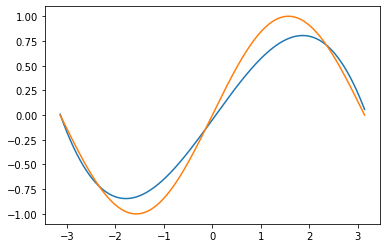

In [20]:
plt.plot(x,y_pred.data)
plt.plot(x,y)

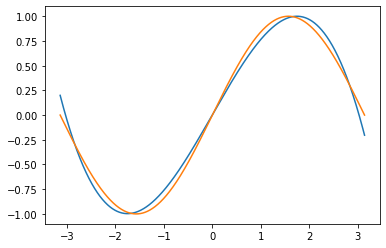

In [22]:
plt.plot(x,y_pred.data)
plt.plot(x,y)

In [24]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

In [26]:
temp1 = torch.tensor([1,1,2,3,1])
temp2 = torch.tensor([1,1,2,2,1])

In [27]:
nll(temp1,temp2)

IndexError: too many indices for tensor of dimension 1